# Подготовка данных к 5 неделе, часть 2.
Глазунов А.В.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
cd /content/gdrive/'My Drive'/Colab_Notebooks/ML_c6_TAXI

/content/gdrive/My Drive/Colab_Notebooks/ML_c6_TAXI


In [0]:
PATH_TO_DATA = 'data'

In [0]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.base import BaseEstimator, TransformerMixin

import os
import pandas as pd
import numpy as np
from scipy import stats
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import gc
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from itertools import product
from sklearn.metrics import mean_absolute_error as mae
from sklearn.cluster import KMeans, AgglomerativeClustering

import scipy.cluster.hierarchy as shc

from scipy.cluster.hierarchy import dendrogram

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.manifold import TSNE,MDS
import folium


from sklearn.preprocessing import PowerTransformer

from scipy import stats
from dateutil.relativedelta import relativedelta

In [0]:
zones = ['1075', '1076', '1077', '1125', '1126', '1127', '1128', '1129', '1130', '1131', '1132', '1172', '1173', '1174', '1175', \
         '1176', '1177', '1178', '1179', '1180', '1181', '1182', '1183', '1184', '1221', '1222', '1223', '1224', '1225', '1227',\
        '1228', '1229', '1230', '1231', '1232', '1233', '1234', '1235', '1272', '1273', '1274', '1278', '1279', '1280', '1281',\
        '1282', '1283', '1284', '1285', '1286', '1287', '1326', '1327', '1331', '1332', '1333', '1334', '1335', '1336', '1337', \
        '1338', '1339', '1376', '1377', '1378', '1380', '1382', '1383', '1384', '1385', '1386', '1387', '1388', '1389', '1390', \
        '1426', '1431', '1434', '1435', '1436', '1437', '1438', '1439', '1441', '1442', '1480', '1482', '1483', '1530', '1532', \
        '1533', '1580', '1630', '1684', '1733', '1734', '1783', '2068', '2069', '2118', '2119', '2168']
zones = list(map(np.int64,zones))
len(zones)

102

In [0]:
time_series_7_month = pd.read_csv(os.path.join(PATH_TO_DATA,'time_series_7_month.csv'),index_col=0)
time_series_7_month.columns = range(1,2501)
dt = [pd.to_datetime(tt) for tt in list(time_series_7_month.index)]
time_series_7_month.index = dt
time_series_7_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
2015-12-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-12-01 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-12-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-12-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-12-01 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
reg_sarimax_pred_6m = pd.read_csv(os.path.join(PATH_TO_DATA,'pred_6m.csv'),index_col=0)
cols_6m = [int(col) for col in reg_sarimax_pred_6m.columns]
dt = [pd.to_datetime(tt) for tt in list(reg_sarimax_pred_6m.index)]
reg_sarimax_pred_6m.index = dt
reg_sarimax_pred_6m.head()

,1075,1076,1077,1125,1126,1127,1128,1129,1130,1131,1132,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1221,1222,1223,1224,1225,1227,1228,1229,1230,1231,1232,1233,1234,1235,1272,1273,...,1376,1377,1378,1380,1382,1383,1384,1385,1386,1387,1388,1389,1390,1426,1431,1434,1435,1436,1437,1438,1439,1441,1442,1480,1482,1483,1530,1532,1533,1580,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
2015-12-01 00:00:00,56.443057,125.114745,86.419083,61.938482,157.332301,231.918045,239.010813,233.886513,264.015196,109.328995,49.861316,2.837765,11.088365,16.902258,4.995286,12.363736,129.773066,288.569068,429.898734,493.846242,731.283026,362.074398,84.565111,18.180836,1.950882,4.357242,8.558190,17.144728,2.630862,77.327537,189.015047,338.843594,575.968231,689.619802,719.962225,489.974933,330.240447,138.431321,3.596188,4.482132,...,3.118508,2.328525,2.893408,4.855000,29.679652,250.123261,360.372166,223.421254,32.435865,19.073848,13.187635,9.344138,8.772092,1.226392,13.520102,8.902850,6.420776,21.682445,20.048974,7.290172,4.382292,3.029045,4.476081,7.262074,7.337301,7.250478,7.392488,3.613962,5.571939,2.802574,2.924959,14.240362,6.808059,256.916832,212.455488,97.462591,11.042606,153.932043,32.647354,80.773764
2015-12-01 01:00:00,56.797194,125.669555,86.966375,62.583772,158.332989,232.936974,240.793906,234.971244,265.670243,109.866495,49.926910,2.859425,11.131106,16.991990,4.995017,12.386067,130.295430,290.627785,428.782854,491.663054,714.081200,360.200998,84.605179,18.222821,1.946615,4.343242,8.544385,17.171725,2.643395,77.452889,189.671024,337.456665,568.000890,686.846518,721.653851,488.183037,329.443426,138.626798,3.586257,4.461952,...,3.099207,2.315885,2.888630,4.848222,29.871150,250.519910,357.359456,223.778360,32.535914,19.138145,13.207992,9.372648,8.772680,1.218394,13.551653,8.952268,6.415272,21.672073,20.020397,7.291256,4.385337,3.036813,4.523335,7.279824,7.332547,7.254795,7.377769,3.608900,5.547872,2.806532,2.913540,14.191560,6.771497,254.818407,209.780467,96.755368,10.914783,152.710728,32.407586,80.101161
2015-12-01 02:00:00,57.155572,126.224686,87.495996,63.182516,159.331401,233.761217,241.409177,236.208229,267.508869,110.368701,49.980330,2.880959,11.179850,17.084000,4.998683,12.417402,130.945031,292.858069,426.635370,487.677836,701.043101,358.372642,84.737771,18.267746,1.944374,4.333416,8.536224,17.204587,2.657039,77.647326,190.485935,333.882430,557.560967,680.611318,716.479799,485.835619,329.173893,138.889019,3.580232,4.446013,...,3.084302,2.306284,2.886533,4.843582,30.041598,251.135078,355.199584,224.313922,32.637976,19.216104,13.240642,9.407619,8.783116,1.212349,13.583644,8.999263,6.412374,21.673727,20.003382,7.296303,4.391499,3.048298,4.575245,7.297815,7.332655,7.262672,7.365427,3.606211,5.528470,2.810966,2.903752,14.129357,6.730925,252.201811,207.097194,96.006971,10.783167,151.346226,32.159734,79.382065
2015-12-01 03:00:00,57.516078,126.815723,88.013537,63.755485,160.231537,234.521968,242.360450,237.591815,269.521333,110.962171,50.021248,2.902054,11.233876,17.177476,5.006164,12.457176,131.716240,295.252068,425.469379,485.281876,693.414647,357.523567,84.906997,18.315335,1.944076,4.327622,8.533463,17.242905,2.671634,77.907631,191.451339,330.478060,549.540563,675.276242,710.337304,484.473738,329.239685,139.200587,3.577965,4.434150,...,3.073609,2.299593,2.886994,4.841005,30.191468,251.914544,354.075726,224.927001,32.741753,19.306218,13.284766,9.448215,8.802740,1.208182,13.615513,9.043747,6.411838,21.686525,19.997658,7.305089,4.400539,3.063208,4.631367,7.315726,7.337083,7.273652,7.355133,3.605572,5.513326,2.815616,2.895406,14.055095,6.686681,249.612563,204.525667,95.236173,10.648348,149.896339,31.905397,78.620038
2015-12-01 04:00:00,57.879168,127.426915,88.525152,64.314056,161.218200,235.598591,243.439623,239.112925,271.692998,111.645311,50.049192,2.922419,11.292445,17.271607,5.017307,12.504800,132.603189,297.794226,425.470730,483.745378,686.474783,357.304520,85.141586,18.365276,1.945633,4.325706,8.535849,17.286265,2.6

In [0]:
reg_sarimax_pred_may = pd.read_csv(os.path.join(PATH_TO_DATA,'pred_may.csv'),index_col=0)
cols_may  = [int(col) for col in reg_sarimax_pred_may.columns]
dt = [pd.to_datetime(tt) for tt in list(reg_sarimax_pred_may.index)]
reg_sarimax_pred_may.index = dt
reg_sarimax_pred_may.head()

,1075,1076,1077,1125,1126,1127,1128,1129,1130,1131,1132,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1221,1222,1223,1224,1225,1227,1228,1229,1230,1231,1232,1233,1234,1235,1272,1273,...,1376,1377,1378,1380,1382,1383,1384,1385,1386,1387,1388,1389,1390,1426,1431,1434,1435,1436,1437,1438,1439,1441,1442,1480,1482,1483,1530,1532,1533,1580,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
2016-05-01 00:00:00,62.889920,79.499906,35.576957,67.945393,219.485354,475.937411,639.288230,753.268031,873.979673,143.470673,11.800448,10.336260,45.300173,27.087775,7.379749,46.409655,860.170334,1016.551088,688.215344,842.66376,677.254889,759.582373,105.295644,8.799973,14.671939,28.468282,35.161970,41.830263,4.439611,580.293171,1121.218967,955.751913,1369.905672,715.954160,1124.548861,774.385127,417.167618,125.588532,22.900451,36.727308,...,66.825942,41.774879,24.497884,13.172885,7.511026,138.061953,439.503653,124.248329,22.786865,41.780196,39.688258,16.393127,15.044120,30.059965,26.969698,1.621956,7.919141,32.737323,27.400458,8.618687,6.560521,7.288578,5.871591,12.373658,27.839111,10.499069,11.402990,16.755071,22.823340,4.355113,7.257456,-11.337197,0.698530,33.207675,-77.135024,71.509333,13.643422,156.604317,15.584210,63.198536
2016-05-01 01:00:00,44.679738,49.992454,9.840262,42.995824,153.760125,404.292188,505.181362,634.184639,822.459390,150.284505,5.314556,5.855092,23.265742,16.455489,1.732265,41.283097,735.014984,871.446299,476.744596,679.98286,473.584094,546.839880,88.813760,4.408263,9.081551,19.997278,19.599874,27.043648,4.373338,521.167178,965.458149,818.467397,1070.782415,472.177405,785.037681,501.986108,234.250008,84.355778,14.336975,25.035372,...,53.997010,29.984509,17.341199,10.537786,2.219793,78.483650,323.541731,54.158047,15.288911,28.482348,26.773219,12.467124,14.913764,24.213989,20.691748,0.318194,7.035335,28.161956,20.554543,7.785029,7.309948,4.145921,3.880601,12.689868,25.488677,8.756506,9.710770,17.197880,20.810532,5.111820,9.811808,-8.128187,-1.388860,-92.462868,-115.311430,37.560627,7.276380,67.808814,18.269786,36.707738
2016-05-01 02:00:00,23.911220,34.867288,-2.555917,16.209278,94.089356,300.255709,367.561439,439.353931,728.788386,164.625506,1.981319,2.287556,14.958097,8.491731,2.434411,29.801700,552.030910,650.941778,312.477567,497.10632,317.938518,388.944688,66.598022,2.851675,4.839516,11.844579,12.670195,18.946923,2.403360,404.308211,721.511864,685.672017,827.009963,283.834861,542.803918,294.197623,135.895907,54.593531,8.477211,13.722814,...,44.177321,22.880131,14.980772,6.860456,-1.614885,26.493231,227.756125,33.854919,9.806094,19.458789,17.035787,8.936731,9.110665,17.287888,14.153623,-0.589165,5.290950,18.400980,15.298548,5.270125,4.155115,3.187618,2.576241,9.670769,14.782689,8.087280,10.474391,14.284219,17.996112,6.689699,10.215492,-8.346926,-1.366168,-90.368990,-103.401911,15.824301,1.561794,13.046093,5.936822,3.367847
2016-05-01 03:00:00,9.134244,22.984076,-13.118526,3.810697,58.115544,230.402477,218.022335,291.491344,633.290275,130.777331,3.350009,2.041656,8.533045,4.125103,1.506901,19.017757,381.740368,421.729300,218.124057,326.46825,166.987930,269.755937,65.327371,1.443845,2.343035,7.223137,7.683653,11.893628,1.233284,292.463428,497.480011,497.727800,549.706221,199.397407,390.770073,140.013452,83.084972,32.524705,4.313278,7.459006,...,29.307255,17.779298,8.552026,4.044462,-3.016978,2.852713,160.404688,7.563925,10.677547,13.143639,12.750490,8.274597,9.709358,10.318650,13.663314,-0.793196,4.510429,14.963014,11.632641,4.219684,3.764503,2.850179,2.210818,8.803369,12.656651,4.524631,11.831033,12.358094,15.253541,4.631604,10.232628,-7.467355,-1.294551,-80.122797,-92.873087,5.931089,1.796558,8.529268,5.390887,3.018664
2016-05-01 04:00:00,5.326245,5.317623,-14.887532,1.839695,49.075888,140.034637,123.068518,144.733572,344.250872,65.177509,2.718285,1.667752,9.366176,3.781785,1.395408,15.870300,194.294756,206.302376,141.237155,200.55175,111.077590,200.163533,52.808183,2.274450,1.889427,5.253806,9.681503,9

In [0]:
reg_sarimax_pred_june = pd.read_csv(os.path.join(PATH_TO_DATA,'pred_june.csv'),index_col=0)
cols_june  = [int(col) for col in reg_sarimax_pred_june.columns]
dt = [pd.to_datetime(tt) for tt in list(reg_sarimax_pred_june.index)]
reg_sarimax_pred_june.index = dt
reg_sarimax_pred_june.head()

,1075,1076,1077,1125,1126,1127,1128,1129,1130,1131,1132,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1221,1222,1223,1224,1225,1227,1228,1229,1230,1231,1232,1233,1234,1235,1272,1273,...,1376,1377,1378,1380,1382,1383,1384,1385,1386,1387,1388,1389,1390,1426,1431,1434,1435,1436,1437,1438,1439,1441,1442,1480,1482,1483,1530,1532,1533,1580,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
2016-06-01 00:00:00,25.602848,49.130421,22.834781,37.589112,86.189008,129.318363,236.866875,267.524731,401.724623,92.863217,-2.600604,6.027248,13.321816,13.859673,7.160289,20.129866,294.499688,322.571544,268.962279,193.404565,165.995748,249.497821,36.938725,2.654783,7.590464,10.694494,17.673687,21.616504,3.161814,180.369650,294.646716,189.767308,280.885958,431.594467,636.696620,236.764514,69.108532,30.603522,11.500498,14.165505,...,21.814167,12.249945,12.714513,8.368758,19.464541,40.767831,128.738847,63.918603,17.643904,18.779988,17.919012,10.895939,14.657657,10.299158,18.279455,0.565550,4.176442,17.505657,16.014293,6.375663,5.184466,4.693409,4.634301,8.772307,6.659493,4.950019,7.819770,10.063572,17.744083,3.225800,6.896608,5.778601,3.822963,203.870968,2.799939,83.793774,6.703642,192.363650,19.809387,106.060887
2016-06-01 01:00:00,11.528346,33.712753,7.908936,28.389927,46.468347,67.851360,169.538599,203.991694,335.769566,94.149448,-5.902810,3.361814,8.399324,10.802351,2.425238,18.334345,230.707263,253.413560,164.970711,91.474126,70.848982,189.527979,27.377814,2.301461,4.553841,6.832923,10.329821,16.577317,1.814006,151.285350,244.812138,120.806225,144.759521,319.566324,430.762515,132.238454,30.580548,9.742895,7.300693,9.553995,...,17.123085,11.285196,9.500690,6.809000,10.780288,24.439645,74.717998,40.849575,10.746959,14.280327,14.510208,7.326580,12.712123,8.403740,13.301065,0.495496,3.534233,15.126776,13.201751,5.115640,5.085488,3.381703,3.083040,8.365400,7.968915,4.655792,8.706467,11.406523,16.508975,2.806593,6.469764,4.108992,1.384134,52.489586,-36.660824,17.178802,4.416283,83.865299,7.683962,57.341299
2016-06-01 02:00:00,5.106288,23.936588,3.679640,19.375321,26.542561,47.515337,128.028321,167.148413,348.644233,92.828543,-4.844880,1.649249,7.549023,5.285678,1.110919,12.414553,172.171462,186.932878,113.838831,64.730853,90.194130,139.272847,26.015717,0.651096,2.710694,4.741723,6.143649,10.022187,1.289742,121.206034,206.576115,80.501396,89.432342,211.171810,321.329186,89.155574,4.488864,6.113053,3.411668,5.568412,...,15.604910,7.841521,6.212512,3.831416,9.132587,19.985705,49.281072,27.713248,10.088264,11.601841,8.957743,6.790691,8.428375,6.951316,11.287839,0.336661,2.185887,11.159926,10.273112,3.672835,3.469587,2.107846,2.603299,6.177351,6.801992,2.767174,7.620858,10.949528,14.191815,2.674581,6.734603,3.166284,0.347872,14.027742,-27.226730,1.158633,0.650942,8.658848,11.577983,11.662323
2016-06-01 03:00:00,3.770281,19.525668,4.005729,16.972328,19.946896,37.542932,78.172131,135.990752,295.628608,84.360872,-3.830816,0.776204,4.122795,3.209483,0.775795,8.430671,136.433946,138.812370,79.738994,37.992862,77.071347,127.206206,32.481212,0.949441,1.216534,2.683648,5.169032,6.632567,0.485467,85.706872,159.736007,63.457196,70.623162,178.128912,271.044948,72.011518,2.779411,3.977568,2.227269,2.370448,...,10.596939,5.205363,4.474024,2.094122,7.063544,25.589067,42.623634,30.396339,6.640531,6.240384,6.450700,3.624274,6.801639,4.305546,11.781310,0.392932,2.137163,7.053564,6.613474,3.680827,3.124686,1.707520,1.738111,3.921954,7.005958,3.502037,7.235800,8.302514,9.394762,2.044841,6.292126,2.637836,0.196365,8.851294,-19.104075,-4.550638,-0.291715,11.425633,0.740231,8.529192
2016-06-01 04:00:00,7.673063,19.316690,9.505673,19.729529,26.822484,29.834731,57.938463,97.810327,172.112999,48.259457,-3.882628,0.842680,6.329684,3.823319,1.291421,4.621724,83.687532,95.427462,91.925927,59.490891,144.090353,164.118238,31.823015,2.419160,1.688657,2.872059,5.732099,5.924174,0.323665,74.773981,135.739002,66.315475,91.117615,170.999309,280.596059,96.756725,17.310270,

In [0]:
pred_reg_sarimax = pd.concat([reg_sarimax_pred_6m.loc[:pd.to_datetime('2016-04-30 23:00:00')],reg_sarimax_pred_may,reg_sarimax_pred_june])
pred_reg_sarimax

,1075,1076,1077,1125,1126,1127,1128,1129,1130,1131,1132,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1221,1222,1223,1224,1225,1227,1228,1229,1230,1231,1232,1233,1234,1235,1272,1273,...,1376,1377,1378,1380,1382,1383,1384,1385,1386,1387,1388,1389,1390,1426,1431,1434,1435,1436,1437,1438,1439,1441,1442,1480,1482,1483,1530,1532,1533,1580,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
2015-12-01 00:00:00,56.443057,125.114745,86.419083,61.938482,157.332301,231.918045,239.010813,233.886513,264.015196,109.328995,49.861316,2.837765,11.088365,16.902258,4.995286,12.363736,129.773066,288.569068,429.898734,493.846242,731.283026,362.074398,84.565111,18.180836,1.950882,4.357242,8.558190,17.144728,2.630862,77.327537,189.015047,338.843594,575.968231,689.619802,719.962225,489.974933,330.240447,138.431321,3.596188,4.482132,...,3.118508,2.328525,2.893408,4.855000,29.679652,250.123261,360.372166,223.421254,32.435865,19.073848,13.187635,9.344138,8.772092,1.226392,13.520102,8.902850,6.420776,21.682445,20.048974,7.290172,4.382292,3.029045,4.476081,7.262074,7.337301,7.250478,7.392488,3.613962,5.571939,2.802574,2.924959,14.240362,6.808059,256.916832,212.455488,97.462591,11.042606,153.932043,32.647354,80.773764
2015-12-01 01:00:00,56.797194,125.669555,86.966375,62.583772,158.332989,232.936974,240.793906,234.971244,265.670243,109.866495,49.926910,2.859425,11.131106,16.991990,4.995017,12.386067,130.295430,290.627785,428.782854,491.663054,714.081200,360.200998,84.605179,18.222821,1.946615,4.343242,8.544385,17.171725,2.643395,77.452889,189.671024,337.456665,568.000890,686.846518,721.653851,488.183037,329.443426,138.626798,3.586257,4.461952,...,3.099207,2.315885,2.888630,4.848222,29.871150,250.519910,357.359456,223.778360,32.535914,19.138145,13.207992,9.372648,8.772680,1.218394,13.551653,8.952268,6.415272,21.672073,20.020397,7.291256,4.385337,3.036813,4.523335,7.279824,7.332547,7.254795,7.377769,3.608900,5.547872,2.806532,2.913540,14.191560,6.771497,254.818407,209.780467,96.755368,10.914783,152.710728,32.407586,80.101161
2015-12-01 02:00:00,57.155572,126.224686,87.495996,63.182516,159.331401,233.761217,241.409177,236.208229,267.508869,110.368701,49.980330,2.880959,11.179850,17.084000,4.998683,12.417402,130.945031,292.858069,426.635370,487.677836,701.043101,358.372642,84.737771,18.267746,1.944374,4.333416,8.536224,17.204587,2.657039,77.647326,190.485935,333.882430,557.560967,680.611318,716.479799,485.835619,329.173893,138.889019,3.580232,4.446013,...,3.084302,2.306284,2.886533,4.843582,30.041598,251.135078,355.199584,224.313922,32.637976,19.216104,13.240642,9.407619,8.783116,1.212349,13.583644,8.999263,6.412374,21.673727,20.003382,7.296303,4.391499,3.048298,4.575245,7.297815,7.332655,7.262672,7.365427,3.606211,5.528470,2.810966,2.903752,14.129357,6.730925,252.201811,207.097194,96.006971,10.783167,151.346226,32.159734,79.382065
2015-12-01 03:00:00,57.516078,126.815723,88.013537,63.755485,160.231537,234.521968,242.360450,237.591815,269.521333,110.962171,50.021248,2.902054,11.233876,17.177476,5.006164,12.457176,131.716240,295.252068,425.469379,485.281876,693.414647,357.523567,84.906997,18.315335,1.944076,4.327622,8.533463,17.242905,2.671634,77.907631,191.451339,330.478060,549.540563,675.276242,710.337304,484.473738,329.239685,139.200587,3.577965,4.434150,...,3.073609,2.299593,2.886994,4.841005,30.191468,251.914544,354.075726,224.927001,32.741753,19.306218,13.284766,9.448215,8.802740,1.208182,13.615513,9.043747,6.411838,21.686525,19.997658,7.305089,4.400539,3.063208,4.631367,7.315726,7.337083,7.273652,7.355133,3.605572,5.513326,2.815616,2.895406,14.055095,6.686681,249.612563,204.525667,95.236173,10.648348,149.896339,31.905397,78.620038
2015-12-01 04:00:00,57.879168,127.426915,88.525152,64.314056,161.218200,235.598591,243.439623,239.112925,271.692998,111.645311,50.049192,2.922419,11.292445,17.271607,5.017307,12.504800,132.603189,297.794226,425.470730,483.745378,686.474783,357.304520,85.141586,18.365276,1.945633,4.325706,8.535849,17.286265,2.6

In [0]:
hour_counter = list(range(1,time_series_7_month.shape[0]+1))
year = [tt.year for tt in list(time_series_7_month.index)]
month = [tt.month for tt in list(time_series_7_month.index)]
month_name = [tt.month_name() for tt in list(time_series_7_month.index)]
day_of_year = [tt.dayofyear for tt in list(time_series_7_month.index)]
day_of_month = [tt.day for tt in list(time_series_7_month.index)]
day_of_week = [tt.dayofweek for tt in list(time_series_7_month.index)]
day_name = [tt.day_name() for tt in list(time_series_7_month.index)]
day_hour = [tt.hour for tt in list(time_series_7_month.index)]
common_features_zones = pd.DataFrame([hour_counter,year,month,month_name,day_of_year,day_of_month,\
                                      day_of_week,day_name,day_hour]).T
common_features_zones.columns = ['hour_counter','year','month','month_name','day_of_year','day_of_month',\
                                      'day_of_week','day_name','day_hour']                                 
common_features_zones

,hour_counter,year,month,month_name,day_of_year,day_of_month,day_of_week,day_name,day_hour
0,1,2015,12,December,335,1,1,Tuesday,0
1,2,2015,12,December,335,1,1,Tuesday,1
2,3,2015,12,December,335,1,1,Tuesday,2
3,4,2015,12,December,335,1,1,Tuesday,3
4,5,2015,12,December,335,1,1,Tuesday,4
...,...,...,...,...,...,...,...,...,...
5107,5108,2016,6,June,182,30,3,Thursday,19
5108,5109,2016,6,June,182,30,3,Thursday,20
5109,5110,2016,6,June,182,30,3,Thursday,21
5110,5111,2016,6,June,182,30,3,Thursday,22


In [0]:
%%time
zones_raw_feats_list = []
for zone in tqdm_notebook(time_series_7_month[zones].columns):
  zone_raw_feats = common_features_zones.copy()
  zone_ts = time_series_7_month[zone]
  zone_id = zone_ts.name
  zone_raw_feats['zone_id'] =  zone_id 
  zone_raw_feats['datetime'] = zone_ts.index  
  zone_ts = zone_ts.values

  history_12_24_168_720 = np.zeros((zone_ts.shape[0],4))
  for ind in range(history_12_24_168_720.shape[0]):
    history_12_24_168_720[ind,0] = np.sum(zone_ts[ind-12:ind+1])
    history_12_24_168_720[ind,1] = np.sum(zone_ts[ind-24:ind+1])
    history_12_24_168_720[ind,2] = np.sum(zone_ts[ind-168:ind+1])
    history_12_24_168_720[ind,3] = np.sum(zone_ts[ind-720:ind+1])
  zone_raw_feats['history_12'] =  history_12_24_168_720[:,0]
  zone_raw_feats['history_24'] =  history_12_24_168_720[:,1]
  zone_raw_feats['history_168'] =  history_12_24_168_720[:,2]
  zone_raw_feats['history_720'] =  history_12_24_168_720[:,3]

  zone_raw_feats['ts'] = zone_ts
  
  zones_raw_feats_list.append(zone_raw_feats)

raw_feats = pd.concat(zones_raw_feats_list,ignore_index=True)



CPU times: user 18.5 s, sys: 2.41 s, total: 20.9 s
Wall time: 18.4 s


In [0]:
raw_feats

,hour_counter,year,month,month_name,day_of_year,day_of_month,day_of_week,day_name,day_hour,zone_id,datetime,history_12,history_24,history_168,history_720,ts
0,1,2015,12,December,335,1,1,Tuesday,0,1075,2015-12-01 00:00:00,0.0,0.0,0.0,0.0,19
1,2,2015,12,December,335,1,1,Tuesday,1,1075,2015-12-01 01:00:00,0.0,0.0,0.0,0.0,16
2,3,2015,12,December,335,1,1,Tuesday,2,1075,2015-12-01 02:00:00,0.0,0.0,0.0,0.0,8
3,4,2015,12,December,335,1,1,Tuesday,3,1075,2015-12-01 03:00:00,0.0,0.0,0.0,0.0,3
4,5,2015,12,December,335,1,1,Tuesday,4,1075,2015-12-01 04:00:00,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521419,5108,2016,6,June,182,30,3,Thursday,19,2168,2016-06-30 19:00:00,14.0,28.0,229.0,22399.0,1
521420,5109,2016,6,June,182,30,3,Thursday,20,2168,2016-06-30 20:00:00,10.0,28.0,227.0,22296.0,0
521421,5110,2016,6,June,182,30,3,Thursday,21,2168,2016-06-30 21:00:00,10.0,28.0,228.0,22186.0,1
521422,5111,2016,6,June,182,30,3,Thursday,22,2168,2016-06-30 22:00:00,10.0,28.0,228.0,22056.0,0


In [0]:
raw_feats.iloc[:13]

,hour_counter,year,month,month_name,day_of_year,day_of_month,day_of_week,day_name,day_hour,zone_id,datetime,history_12,history_24,history_168,history_720,ts
0,1,2015,12,December,335,1,1,Tuesday,0,1075,2015-12-01 00:00:00,0.0,0.0,0.0,0.0,19
1,2,2015,12,December,335,1,1,Tuesday,1,1075,2015-12-01 01:00:00,0.0,0.0,0.0,0.0,16
2,3,2015,12,December,335,1,1,Tuesday,2,1075,2015-12-01 02:00:00,0.0,0.0,0.0,0.0,8
3,4,2015,12,December,335,1,1,Tuesday,3,1075,2015-12-01 03:00:00,0.0,0.0,0.0,0.0,3
4,5,2015,12,December,335,1,1,Tuesday,4,1075,2015-12-01 04:00:00,0.0,0.0,0.0,0.0,2
5,6,2015,12,December,335,1,1,Tuesday,5,1075,2015-12-01 05:00:00,0.0,0.0,0.0,0.0,7
6,7,2015,12,December,335,1,1,Tuesday,6,1075,2015-12-01 06:00:00,0.0,0.0,0.0,0.0,20
7,8,2015,12,December,335,1,1,Tuesday,7,1075,2015-12-01 07:00:00,0.0,0.0,0.0,0.0,54
8,9,2015,12,December,335,1,1,Tuesday,8,1075,2015-12-01 08:00:00,0.0,0.0,0.0,0.0,94
9,10,2015,12,December,335,1,1,Tuesday,9,1075,2015-12-01 09:00:00,0.0,0.0,0.0,0.0,81


In [0]:
raw_feats_fill_0 = raw_feats.copy()

In [0]:
%%time
for zone in tqdm_notebook(zones):
  data_zone = raw_feats_fill_0[raw_feats_fill_0['zone_id'] == zone].copy()
  for day in range(7):  
    for hour in range(0,24):   
    
      for col in ['history_12',	'history_24','history_168','history_720']:
        col_mean_day_hour_value = data_zone[data_zone['day_of_week'] == day][data_zone['day_hour'] ==hour][col][5:].mean()
     
        inds = data_zone[data_zone['day_of_week'] == day][data_zone['day_hour'] ==hour][data_zone[col]==0][col].index
     
        raw_feats_fill_0.at[inds,col] = col_mean_day_hour_value 
  print(zone)

        
  
      


1075
1076
1077
1125
1126
1127
1128
1129
1130
1131
1132
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1221
1222
1223
1224
1225
1227
1228
1229
1230
1231
1232
1233
1234
1235
1272
1273
1274
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1326
1327
1331
1332
1333
1334
1335
1336
1337
1338
1339
1376
1377
1378
1380
1382
1383
1384
1385
1386
1387
1388
1389
1390
1426
1431
1434
1435
1436
1437
1438
1439
1441
1442
1480
1482
1483
1530
1532
1533
1580
1630
1684
1733
1734
1783
2068
2069
2118
2119
2168

CPU times: user 10min 15s, sys: 5.1 s, total: 10min 20s
Wall time: 10min 20s


In [0]:
raw_feats_fill_0[['history_12',	'history_24',	'history_168','history_720']].iloc[5:30]

,history_12,history_24,history_168,history_720
5,626.653846,1383.153846,10537.423077,43844.038462
6,560.769231,1398.230769,10553.461538,43859.884615
7,500.692308,1420.923077,10574.192308,43893.115385
8,488.846154,1464.538462,10611.538462,43959.576923
9,472.346154,1466.461538,10602.730769,44008.846154
10,445.615385,1468.807692,10591.384615,44028.461538
11,455.423077,1488.115385,10607.461538,44046.653846
12,543.000000,1509.615385,10620.730769,44055.076923
13,617.000000,1525.076923,10627.846154,44056.538462
14,707.000000,1535.846154,10631.346154,44052.307692


In [0]:
np.sum(np.sum(raw_feats_fill_0[['history_12',	'history_24',	'history_168','history_720']]==0)),np.sum(np.sum(raw_feats[['history_12',	'history_24',	'history_168','history_720']]==0))

(0, 94561)

In [0]:
raw_feats_fill_0

,hour_counter,year,month,month_name,day_of_year,day_of_month,day_of_week,day_name,day_hour,zone_id,datetime,history_12,history_24,history_168,history_720,ts
0,1,2015,12,December,335,1,1,Tuesday,0,1075,2015-12-01 00:00:00,1031.269231,1385.807692,10552.346154,43939.576923,19
1,2,2015,12,December,335,1,1,Tuesday,1,1075,2015-12-01 01:00:00,967.538462,1382.846154,10543.153846,43900.000000,16
2,3,2015,12,December,335,1,1,Tuesday,2,1075,2015-12-01 02:00:00,887.346154,1379.730769,10535.269231,43872.423077,8
3,4,2015,12,December,335,1,1,Tuesday,3,1075,2015-12-01 03:00:00,792.615385,1379.153846,10531.961538,43854.961538,3
4,5,2015,12,December,335,1,1,Tuesday,4,1075,2015-12-01 04:00:00,699.884615,1379.884615,10532.576923,43844.884615,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521419,5108,2016,6,June,182,30,3,Thursday,19,2168,2016-06-30 19:00:00,14.000000,28.000000,229.000000,22399.000000,1
521420,5109,2016,6,June,182,30,3,Thursday,20,2168,2016-06-30 20:00:00,10.000000,28.000000,227.000000,22296.000000,0
521421,5110,2016,6,June,182,30,3,Thursday,21,2168,2016-06-30 21:00:00,10.000000,28.000000,228.000000,22186.000000,1
521422,5111,2016,6,June,182,30,3,Thursday,22,2168,2016-06-30 22:00:00,10.000000,28.000000,228.000000,22056.000000,0


In [0]:
raw_feats_result1 = raw_feats_fill_0.copy()
raw_feats_result2 = raw_feats_fill_0.copy()
raw_feats_result3 = raw_feats_fill_0.copy()
raw_feats_result4 = raw_feats_fill_0.copy()
raw_feats_result5 = raw_feats_fill_0.copy()
raw_feats_result6 = raw_feats_fill_0.copy()

In [0]:
zone_list=[]
for zone in pred_reg_sarimax.columns:
  zone_ts = pred_reg_sarimax[[zone]] 
  zone_ts.columns = ['srmx_forecast']
  zone_list.append(zone_ts)

forecast = pd.concat(zone_list)
forecast.index = raw_feats.index


In [0]:
forecast

,srmx_forecast
0,56.443057
1,56.797194
2,57.155572
3,57.516078
4,57.879168
...,...
521419,117.553181
521420,134.352453
521421,149.984286
521422,148.529189


In [0]:
raw_feats_result1['srmx_forecast'] = forecast['srmx_forecast'].shift(-1)
raw_feats_result1['target']= raw_feats_result1['ts'].shift(-1)

raw_feats_result2['srmx_forecast'] = forecast['srmx_forecast'].shift(-2)
raw_feats_result2['target']= raw_feats_result1['ts'].shift(-2)

raw_feats_result3['srmx_forecast'] = forecast['srmx_forecast'].shift(-3)
raw_feats_result3['target']= raw_feats_result1['ts'].shift(-3)

raw_feats_result4['srmx_forecast'] = forecast['srmx_forecast'].shift(-4)
raw_feats_result4['target']= raw_feats_result1['ts'].shift(-4)

raw_feats_result5['srmx_forecast'] = forecast['srmx_forecast'].shift(-5)
raw_feats_result5['target']= raw_feats_result1['ts'].shift(-5)

raw_feats_result6['srmx_forecast'] = forecast['srmx_forecast'].shift(-6)
raw_feats_result6['target']= raw_feats_result1['ts'].shift(-6)

In [0]:
raw_feats_result6.tail(10)

,hour_counter,year,month,month_name,day_of_year,day_of_month,day_of_week,day_name,day_hour,zone_id,datetime,history_12,history_24,history_168,history_720,ts,srmx_forecast,target
521414,5103,2016,6,June,182,30,3,Thursday,14,2168,2016-06-30 14:00:00,18.0,31.0,225.0,22840.0,0,134.352453,0.0
521415,5104,2016,6,June,182,30,3,Thursday,15,2168,2016-06-30 15:00:00,18.0,28.0,225.0,22766.0,0,149.984286,1.0
521416,5105,2016,6,June,182,30,3,Thursday,16,2168,2016-06-30 16:00:00,20.0,28.0,227.0,22692.0,2,148.529189,0.0
521417,5106,2016,6,June,182,30,3,Thursday,17,2168,2016-06-30 17:00:00,21.0,29.0,228.0,22571.0,1,122.352759,0.0
521418,5107,2016,6,June,182,30,3,Thursday,18,2168,2016-06-30 18:00:00,18.0,28.0,229.0,22479.0,1,NaN,NaN
521419,5108,2016,6,June,182,30,3,Thursday,19,2168,2016-06-30 19:00:00,14.0,28.0,229.0,22399.0,1,NaN,NaN
521420,5109,2016,6,June,182,30,3,Thursday,20,2168,2016-06-30 20:00:00,10.0,28.0,227.0,22296.0,0,NaN,NaN
521421,5110,2016,6,June,182,30,3,Thursday,21,2168,2016-06-30 21:00:00,10.0,28.0,228.0,22186.0,1,NaN,NaN
521422,5111,2016,6,June,182,30,3,Thursday,22,2168,2016-06-30 22:00:00,10.0,28.0,228.0,22056.0,0,NaN,NaN
521423,5112,2016,6,June,182,30,3,Thursday,23,2168,2016-06-30 23:00:00,9.0,27.0,227.0,21933.0,0,NaN,NaN


In [0]:
raw_feats_result1.head(10)

,hour_counter,year,month,month_name,day_of_year,day_of_month,day_of_week,day_name,day_hour,zone_id,datetime,history_12,history_24,history_168,history_720,ts,srmx_forecast,target
0,1,2015,12,December,335,1,1,Tuesday,0,1075,2015-12-01 00:00:00,1031.269231,1385.807692,10552.346154,43939.576923,19,56.797194,16.0
1,2,2015,12,December,335,1,1,Tuesday,1,1075,2015-12-01 01:00:00,967.538462,1382.846154,10543.153846,43900.000000,16,57.155572,8.0
2,3,2015,12,December,335,1,1,Tuesday,2,1075,2015-12-01 02:00:00,887.346154,1379.730769,10535.269231,43872.423077,8,57.516078,3.0
3,4,2015,12,December,335,1,1,Tuesday,3,1075,2015-12-01 03:00:00,792.615385,1379.153846,10531.961538,43854.961538,3,57.879168,2.0
4,5,2015,12,December,335,1,1,Tuesday,4,1075,2015-12-01 04:00:00,699.884615,1379.884615,10532.576923,43844.884615,2,58.244975,7.0
5,6,2015,12,December,335,1,1,Tuesday,5,1075,2015-12-01 05:00:00,626.653846,1383.153846,10537.423077,43844.038462,7,58.613734,20.0
6,7,2015,12,December,335,1,1,Tuesday,6,1075,2015-12-01 06:00:00,560.769231,1398.230769,10553.461538,43859.884615,20,58.985778,54.0
7,8,2015,12,December,335,1,1,Tuesday,7,1075,2015-12-01 07:00:00,500.692308,1420.923077,10574.192308,43893.115385,54,59.365592,94.0
8,9,2015,12,December,335,1,1,Tuesday,8,1075,2015-12-01 08:00:00,488.846154,1464.538462,10611.538462,43959.576923,94,59.750410,81.0
9,10,2015,12,December,335,1,1,Tuesday,9,1075,2015-12-01 09:00:00,472.346154,1466.461538,10602.730769,44008.846154,81,60.115345,56.0


In [0]:
raw_feats_result1

,hour_counter,year,month,month_name,day_of_year,day_of_month,day_of_week,day_name,day_hour,zone_id,datetime,history_12,history_24,history_168,history_720,ts,srmx_forecast,target
0,1,2015,12,December,335,1,1,Tuesday,0,1075,2015-12-01 00:00:00,1031.269231,1385.807692,10552.346154,43939.576923,19,56.797194,16.0
1,2,2015,12,December,335,1,1,Tuesday,1,1075,2015-12-01 01:00:00,967.538462,1382.846154,10543.153846,43900.000000,16,57.155572,8.0
2,3,2015,12,December,335,1,1,Tuesday,2,1075,2015-12-01 02:00:00,887.346154,1379.730769,10535.269231,43872.423077,8,57.516078,3.0
3,4,2015,12,December,335,1,1,Tuesday,3,1075,2015-12-01 03:00:00,792.615385,1379.153846,10531.961538,43854.961538,3,57.879168,2.0
4,5,2015,12,December,335,1,1,Tuesday,4,1075,2015-12-01 04:00:00,699.884615,1379.884615,10532.576923,43844.884615,2,58.244975,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521419,5108,2016,6,June,182,30,3,Thursday,19,2168,2016-06-30 19:00:00,14.000000,28.000000,229.000000,22399.000000,1,134.352453,0.0
521420,5109,2016,6,June,182,30,3,Thursday,20,2168,2016-06-30 20:00:00,10.000000,28.000000,227.000000,22296.000000,0,149.984286,1.0
521421,5110,2016,6,June,182,30,3,Thursday,21,2168,2016-06-30 21:00:00,10.000000,28.000000,228.000000,22186.000000,1,148.529189,0.0
521422,5111,2016,6,June,182,30,3,Thursday,22,2168,2016-06-30 22:00:00,10.000000,28.000000,228.000000,22056.000000,0,122.352759,0.0


In [0]:
(abs(raw_feats_result1['target']-raw_feats_result1['srmx_forecast'])).mean()

23.192763333406003

In [0]:
(pred_reg_sarimax - time_series_7_month[zones]).mean()

1075   NaN
1076   NaN
1077   NaN
1125   NaN
1126   NaN
        ..
2068   NaN
2069   NaN
2118   NaN
2119   NaN
2168   NaN
Length: 204, dtype: float64

In [0]:
np.mean(abs(pred_reg_sarimax.values -time_series_7_month[zones].values))

23.192790662974847

In [0]:
pred_reg_sarimax.shape,time_series_7_month[zones].shape

((5112, 102), (5112, 102))

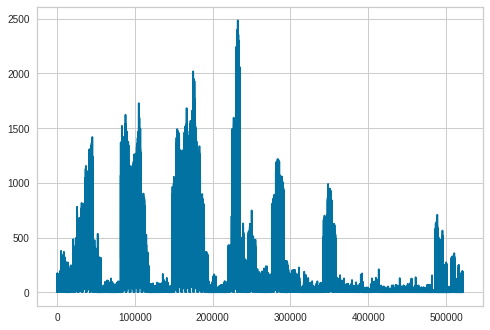

In [0]:
raw_feats_result1['target'].plot()


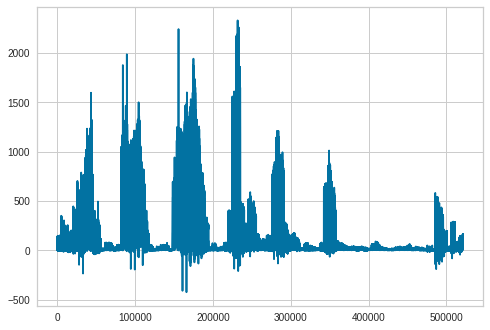

In [0]:
raw_feats_result1['srmx_forecast'].plot()


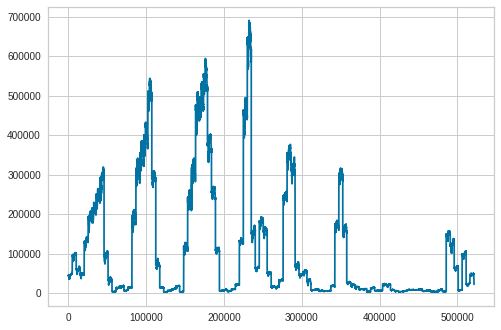

In [0]:
raw_feats_result1['history_720'].plot()

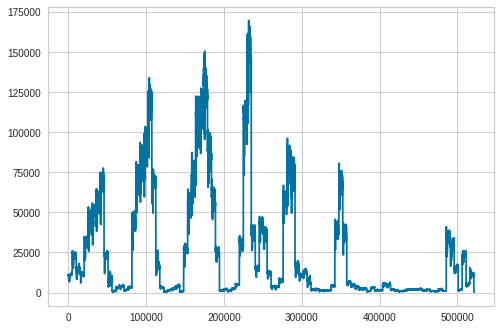

In [0]:

raw_feats_result1['history_168'].plot()

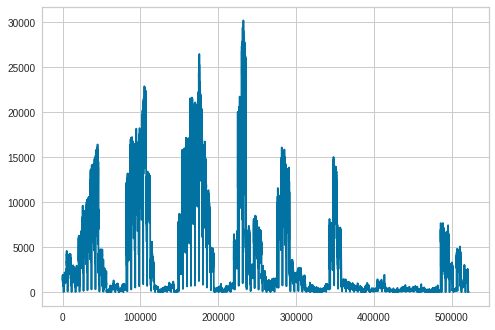

In [0]:
raw_feats_result1['history_24'].plot()

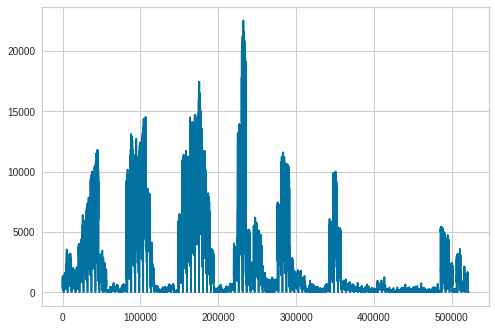

In [0]:
raw_feats_result1['history_12'].plot()

In [0]:
result1 = raw_feats_result1.copy()

result1.at[result1[result1['month_name']=='June'].index,'target']=np.nan

result1 = result1[result1['datetime'] <= pd.to_datetime('2016-06-30 17:00:00')]

result1

,hour_counter,year,month,month_name,day_of_year,day_of_month,day_of_week,day_name,day_hour,zone_id,datetime,history_12,history_24,history_168,history_720,ts,srmx_forecast,target
0,1,2015,12,December,335,1,1,Tuesday,0,1075,2015-12-01 00:00:00,1031.269231,1385.807692,10552.346154,43939.576923,19,56.797194,16.0
1,2,2015,12,December,335,1,1,Tuesday,1,1075,2015-12-01 01:00:00,967.538462,1382.846154,10543.153846,43900.000000,16,57.155572,8.0
2,3,2015,12,December,335,1,1,Tuesday,2,1075,2015-12-01 02:00:00,887.346154,1379.730769,10535.269231,43872.423077,8,57.516078,3.0
3,4,2015,12,December,335,1,1,Tuesday,3,1075,2015-12-01 03:00:00,792.615385,1379.153846,10531.961538,43854.961538,3,57.879168,2.0
4,5,2015,12,December,335,1,1,Tuesday,4,1075,2015-12-01 04:00:00,699.884615,1379.884615,10532.576923,43844.884615,2,58.244975,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521413,5102,2016,6,June,182,30,3,Thursday,13,2168,2016-06-30 13:00:00,20.000000,32.000000,225.000000,22961.000000,1,103.811500,NaN
521414,5103,2016,6,June,182,30,3,Thursday,14,2168,2016-06-30 14:00:00,18.000000,31.000000,225.000000,22840.000000,0,91.161645,NaN
521415,5104,2016,6,June,182,30,3,Thursday,15,2168,2016-06-30 15:00:00,18.000000,28.000000,225.000000,22766.000000,0,128.456656,NaN
521416,5105,2016,6,June,182,30,3,Thursday,16,2168,2016-06-30 16:00:00,20.000000,28.000000,227.000000,22692.000000,2,110.476134,NaN


In [0]:
result2 = raw_feats_result2.copy()
result2.at[result2[result2['month_name']=='June'].index,'target']=np.nan
result2 = result2[result2['datetime'] <= pd.to_datetime('2016-06-30 17:00:00')]

result3 = raw_feats_result3.copy()
result3.at[result3[result3['month_name']=='June'].index,'target']=np.nan
result3 = result3[result3['datetime'] <= pd.to_datetime('2016-06-30 17:00:00')]

result4 = raw_feats_result4.copy()
result4.at[result4[result4['month_name']=='June'].index,'target']=np.nan
result4 = result4[result4['datetime'] <= pd.to_datetime('2016-06-30 17:00:00')]

result5 = raw_feats_result5.copy()
result5.at[result5[result5['month_name']=='June'].index,'target']=np.nan
result5 = result5[result5['datetime'] <= pd.to_datetime('2016-06-30 17:00:00')]

result6 = raw_feats_result6.copy()
result6.at[result6[result6['month_name']=='June'].index,'target']=np.nan
result6 = result6[result6['datetime'] <= pd.to_datetime('2016-06-30 17:00:00')]

In [0]:
result1.to_csv(os.path.join(PATH_TO_DATA,'dataset1.csv'))

In [0]:
ddddf = pd.read_csv(os.path.join(PATH_TO_DATA,'dataset1.csv'),index_col=0)
ddddf.head()

,hour_counter,year,month,month_name,day_of_year,day_of_month,day_of_week,day_name,day_hour,zone_id,datetime,history_12,history_24,history_168,history_720,ts,srmx_forecast,target
0,1,2015,12,December,335,1,1,Tuesday,0,1075,2015-12-01 00:00:00,1031.269231,1385.807692,10552.346154,43939.576923,19,56.797194,16.0
1,2,2015,12,December,335,1,1,Tuesday,1,1075,2015-12-01 01:00:00,967.538462,1382.846154,10543.153846,43900.000000,16,57.155572,8.0
2,3,2015,12,December,335,1,1,Tuesday,2,1075,2015-12-01 02:00:00,887.346154,1379.730769,10535.269231,43872.423077,8,57.516078,3.0
3,4,2015,12,December,335,1,1,Tuesday,3,1075,2015-12-01 03:00:00,792.615385,1379.153846,10531.961538,43854.961538,3,57.879168,2.0
4,5,2015,12,December,335,1,1,Tuesday,4,1075,2015-12-01 04:00:00,699.884615,1379.884615,10532.576923,43844.884615,2,58.244975,7.0


In [0]:
result2.to_csv(os.path.join(PATH_TO_DATA,'dataset2.csv'))
result3.to_csv(os.path.join(PATH_TO_DATA,'dataset3.csv'))
result4.to_csv(os.path.join(PATH_TO_DATA,'dataset4.csv'))
result5.to_csv(os.path.join(PATH_TO_DATA,'dataset5.csv'))
result6.to_csv(os.path.join(PATH_TO_DATA,'dataset6.csv'))